In [ ]:
# Introduction to machine learning
# Algorithms, Models that help computer to learn and Predict
# Applications of machine learning
"""
1. Image processing
2. Speech recognition
3. Fraud detection

Approaches to machine learning
1. Supervised learning: dataset that is labelled,predict, Linear regression, Logistic regression,
decision trees,support vector machines, neural networks (supervised learning algorithms)
2. Unsupervised learning: deals with unlabelled data, clustering algorithms to group data together.
k-means clustering, hierarchical clustering, principal component analysis (PCA)
3. Reinforcement learning: learning by interacting with the environment, reward and punishment

# Problem formulation
Define the problem classification Task, Regression Task, Clustering Task, Reinforcement Task, anomally detection recommendations
Gather the data. 
Split the data: training set, test set, validation set

Data Types
1. Numerical data: continuous data, discrete data
2. Categorical data: ordinal data, nominal data
3. Ordinal data: measure against each other

"""

In [ ]:
# check if scikit-learn is installed
# pip show scikit-learn

# install scikit-learn
# pip install -U scikit-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting/ data visualization
import seaborn as sns # statistical data visualization

# ML Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#control dosplay - optional
pd.options.display.max_columns = 50
sns.set(style="darkgrid",rc={"axes.facecolor": "#CAF1DE"}) 


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
"""
cp- chest pain type
trestbps- resting blood pressure
chol- serum cholestoral in mg/dl
fbs- fasting blood sugar > 120 mg/dl
restecg- resting electrocardiographic results
thalach- maximum heart rate achieved
exang- exercise induced angina
oldpeak- ST depression induced by exercise relative to rest
slope- the slope of the peak exercise ST segment
ca- number of major vessels (0-3) colored by flourosopy
thal- 3 = normal; 6 = fixed defect; 7 = reversable defect
target- 1 or 0 (have disease (1) or not(0))
"""

''

In [6]:
# show number of people with heart diseases
# column target
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [13]:
# show male and female
count_females = len(df[df.sex == 0])
count_males = len(df[df.sex == 1])

print('Percentage of female patients: {:.2f}%'.format(count_females/len(df.sex)*100))
print('Percentage of male patients: {:.2f}%'.format(count_males/len(df.sex)*100))

Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [15]:
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


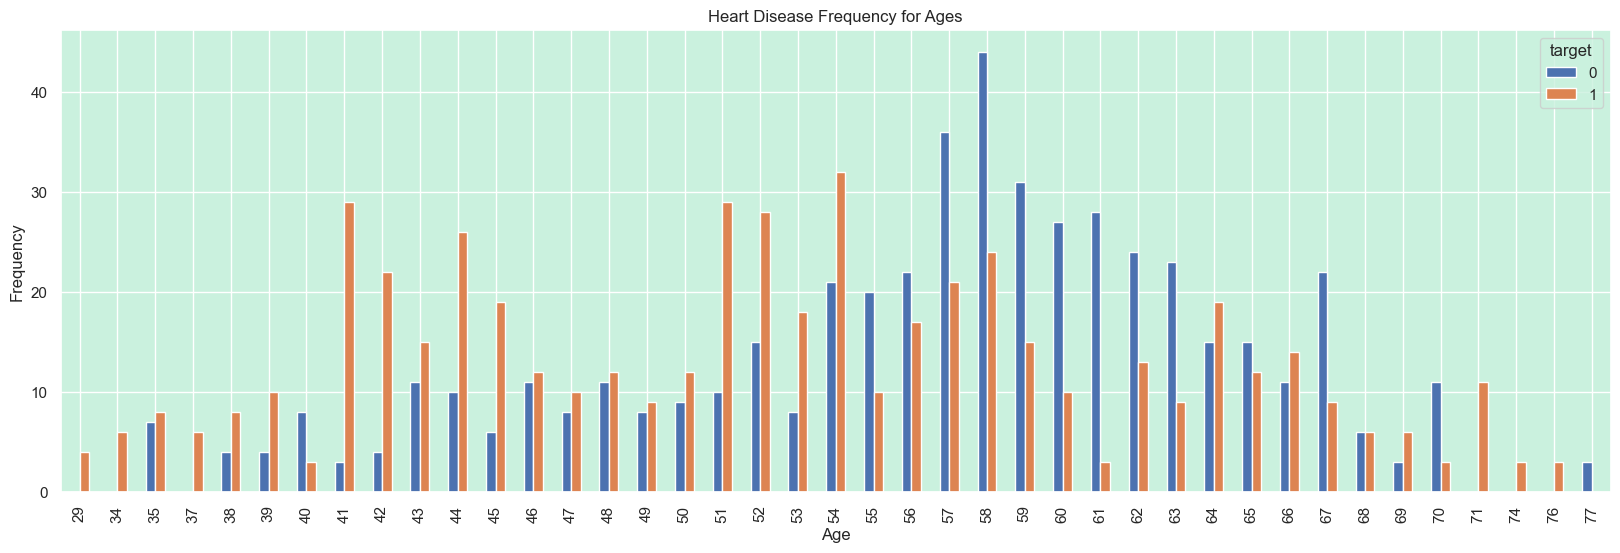

In [21]:
# bar plot showing the frequency of heart disease by age
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

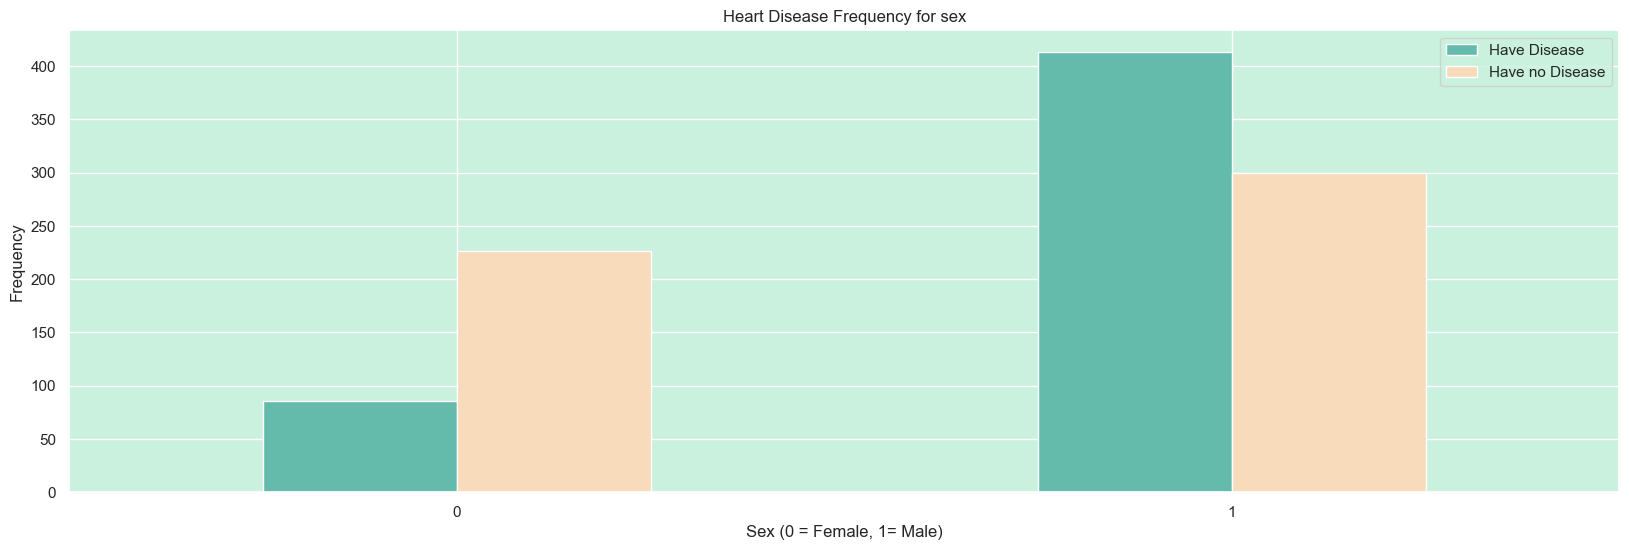

In [26]:
# Data visualization of heart disease frequency for sex
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(20,6), color=["#64BBAC","#F7DBBA"])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('Sex (0 = Female, 1= Male)')
plt.legend(["Have Disease", "Have no Disease"])
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

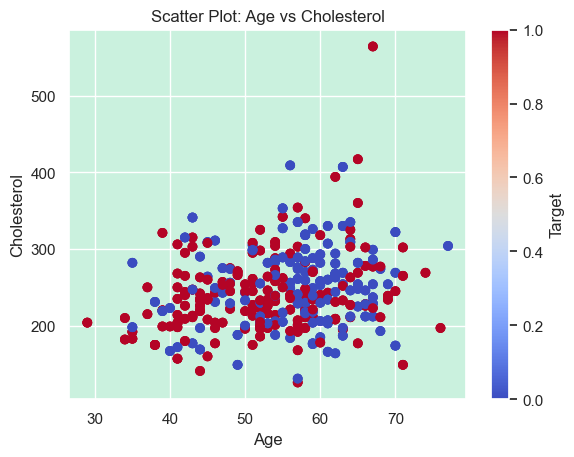

In [27]:
age = df['age']
chol = df['chol']

# Create scatter plot
plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [28]:
# machine learning
# working with ML model
# Accuracy of different ML models
# create a model for logistic regression
# solve problems based on classification. Create independent variables and dependent variables
# categorical prediction

In [29]:
# create a model for logistic regression
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [32]:
# Normalize the data - split data for training and testing
# 80% for training and 20% for testing
# normalize the data X = (X - Xmin) / (Xmax - Xmin)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [ ]:
# Split the data into 80% training and 20% testing

# transpose matrices
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [35]:
# logistic regression
# testing and training
# independent variables and dependent variable
# Decision trees